In [1]:
from localpacks.data import get_data

#data sets
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt

#model tools
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

#metrics
from sklearn.metrics import confusion_matrix, classification_report

#models
from sklearn.ensemble import GradientBoostingClassifier

## Get data

In [2]:
df = get_data()

In [3]:
features_sub_set = ['platform','gender','event_1','event_2','event_3','event_4','event_5']

### Categorical Variables - Get dummies

In [4]:
features_dummies = pd.get_dummies(df[features_sub_set])

In [5]:
# Extract NumPy arrays
X = features_dummies.values
y = df['target_churn_indicator'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (15503, 9) y.shape: (15503,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [7]:
#view the main features
def plot_feature_importances(model, features):
    n_features = np.count_nonzero(features.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

# Ensemble models

In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=10, max_features=3)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.887
Accuracy on test set: 0.709


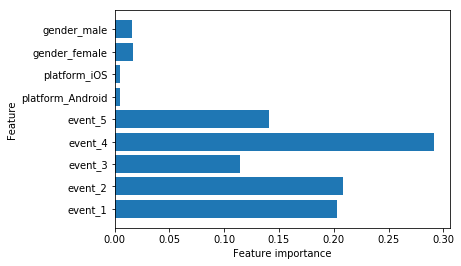

In [9]:

features_dummies)

## Cross Validation

In [10]:
scores = cross_val_score(gbrt, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.68471954 0.7027724  0.7098646  0.69483871 0.68709677 0.69741935
 0.69548387 0.71677419 0.70903226 0.70774194]


In [11]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.70


# Evaluation Metrics and Scoring

In [12]:
pred_gbrt = gbrt.predict(X_test)

In [13]:
confusion = confusion_matrix(y_test, pred_gbrt)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1355  598]
 [ 529 1394]]


In [14]:
print(classification_report(y_test, pred_gbrt))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1953
           1       0.70      0.72      0.71      1923

   micro avg       0.71      0.71      0.71      3876
   macro avg       0.71      0.71      0.71      3876
weighted avg       0.71      0.71      0.71      3876

